# ***PREDICCIÓN DE ACTOS DELICTIVOS - CHICAGO***

## Alumnos:

### `Noelia García`

### `Carlos Astorga`

### `Ramón Denia`

# ***PREDICCIÓN***

---

Importación de las librerias necesarias para realizar la predicción y analisis de las variables. Estas librerias se han ido nutriendo segun avanzaba el codigo

In [2]:
#pip install tensorflow

In [3]:
#Librerias
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import calendar


import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

from datetime import datetime
import time
from time import sleep
%matplotlib inline
plt.style.use('seaborn')

from numpy import arange
from matplotlib import pyplot
from pandas import set_option
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.cluster import AgglomerativeClustering as AC
from sklearn.feature_selection import RFECV

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error

Cargar los datos con los que se cuenta y crear la variable "dataset" que engloba todos los datos.

In [4]:
dataset = pd.read_csv ('DATASET CHICAGO.csv', low_memory = False, encoding="ISO-8859-1")
#Hemos hecho un low_memory=False, porque nos daba problemas a la hora de interpretar el tipo de datos de algunas filas

Eliminamos los valores nulos de nuestro dataset

In [5]:
# Se eliminan los valores nulos
dataset.dropna(axis=0,inplace=True)

Agrupamos las variables del dataset tal y como hemos hecho en el **Notebook_Análisis**

In [6]:
dataset["Primary Type"] = dataset["Primary Type"].replace({
     "THEFT": "THEFT & ROBBERY", "BURGLARY": "THEFT & ROBBERY", "MOTOR VEHICLE THEFT": "THEFT & ROBBERY",
     "ROBBERY": "THEFT & ROBBERY", "BATTERY": "ASSAULT", "CRIM SEXUAL ASSAULT": "ASSAULT", "PROSTITUTION": "SEX CRIMES",
     "SEX OFFENSE": "SEX CRIMES", "CRIMINAL TRESPASS": "CRIMINAL DAMAGE", "ARSON": "CRIMINAL DAMAGE", "OTHER OFFENSE":
     "OTHER OFFENSES", "DECEPTIVE PRACTICE": "OTHER OFFENSES", "WEAPONS VIOLATION": "OTHER OFFENSES", "GAMBLING":
     "OTHER OFFENSES", "STALKING": "OTHER OFFENSES", "KIDNAPPING": "OTHER OFFENSES", "OBSCENITY": "OTHER OFFENSES",
     "INTIMIDATION": "OTHER OFFENSES", "RITUALISM": "OTHER OFFENSES", "HUMAN TRAFFICKING": "OTHER OFFENSES",
     "CONCEALED CARRY LICENSE VIOLATION": "OTHER OFFENSES", "NON-CRIMINAL (SUBJECT SPECIFIED)": "OTHER OFFENSES",
     "NON-CRIMINAL": "OTHER OFFENSES", "PUBLIC PEACE VIOLATION": "OTHER OFFENSES", "OFFENSE INVOLVING CHILDREN":
     "OTHER OFFENSES", "INTERFERENCE WITH PUBLIC OFFICER": "OTHER OFFENSES", "LIQUOR LAW VIOLATION": "OTHER OFFENSES",
     "NON - CRIMINAL": "OTHER OFFENSES", "OTHER NARCOTIC VIOLATION": "NARCOTICS", "PUBLIC INDECENCY": "OTHER OFFENSES",
     "HOMICIDE": "ASSAULT" })

In [7]:
dataset["Location Description"] = dataset['Location Description'].replace({"SIDEWALK":"STREET", "ALLEY":"STREET",
            "APARTMENT":"RESIDENCE","RESIDENCE-GARAGE":"RESIDENCE","RESIDENCE PORCH/HALLWAY": 
            "RESIDENCE", "RESIDENTIAL YARD (FRONT/BACK)":"RESIDENCE","CHA APARTMENT": "RESIDENCE",
            "CHA HALLWAY/STAIRWELL/ELEVATOR": "RESIDENCE","SMALL RETAIL STORE":"RETAIL OUTLET","DRUG STORE":
            "RETAIL OUTLET","GAS STATION":"RETAIL OUTLET","DEPARTMENT STORE":"RETAIL OUTLET","RETAIL STORES":
            "RETAIL OUTLET","RESTAURANT":"BUSINESS","BAR OR TAVERN":"BUSINESS","RESTAURANT":"BUSINESS","BANK":
            "BUSINESS","HOTEL/MOTEL":"BUSINESS","VEHICLE NON-COMMERCIAL":"VEHICLE","PARKING LOT":"PUBLIC BUILDING/GROUNDS",
            "SCHOOL, PUBLIC, BUILDING":"SCHOOL","PARK PROPERTY":"PUBLIC BUILDING/GROUNDS","CTA PLATFORM":
            "PUBLIC BUILDING/GROUNDS","CHA PARKING LOT/GROUNDS":"PUBLIC BUILDING/GROUNDS","SCHOOL, PUBLIC, GROUNDS":
            "SCHOOL", "CTA TRAIN":"PUBLIC BUILDING/GROUNDS","VACANT LOT/LAND":"PUBLIC BUILDING/GROUNDS",
            "GROCERY FOOD STORE":"RETAIL OUTLET","PUBLIC HIGH SCHOOL":"SCHOOL",'CTA "L" TRAIN':
            "PUBLIC BUILDING/GROUNDS","PARKING LOT/GARAGE(NON.RESID.)":"PUBLIC BUILDING/GROUNDS","CTA BUS":"VEHICLE",
            "TAVERN/LIQUOR STORE":"RETAIL OUTLET","HOSPITAL BUILDING/GROUNDS":"HOSPITAL",
            "POLICE FACILITY/VEH PARKING LOT":"POLICE BUILDING","CONVENIENCE STORE":
            "RETAIL OUTLET","CHURCH/SYNAGOGUE/PLACE OF WORSHIP":"CHURCH","GOVERNMENT BUILDING/PROPERTY":
            "FEDERAL BUILDING","SCHOOL, PRIVATE, BUILDING":"SCHOOL","GOVERNMENT BUILDING":
            "FEDERAL BUILDING","CONSTRUCTION SITE":"BUSINESS","WAREHOUSE":"BUSINESS","AIRCRAFT":"AIRPORT",
            "ABANDONED BUILDING":"OTHER","CTA GARAGE / OTHER PROPERTY":"PUBLIC BUILDING/GROUNDS","TAXICAB":"VEHICLE",
            "CTA BUS STOP":"PUBLIC BUILDING/GROUNDS","BARBERSHOP":"BUSINESS","CURRENCY EXCHANGE":"BUSINESS","LIBRARY":
            "PUBLIC BUILDING/GROUNDS","ATHLETIC CLUB":"PUBLIC BUILDING/GROUNDS","MEDICAL/DENTAL OFFICE":"BUSINESS",
            "FACTORY/MANUFACTURING BUILDING":"BUSINESS","COMMERCIAL / BUSINESS OFFICE":"BUSINESS","SCHOOL, PRIVATE, GROUNDS":
            "SCHOOL","CLEANING STORE":"RETAIL OUTLET","VEHICLE-COMMERCIAL":"VEHICLE","COLLEGE/UNIVERSITY GROUNDS":"SCHOOL",
            "DRIVEWAY - RESIDENTIAL":"RESIDENCE","SPORTS ARENA/STADIUM":"PUBLIC BUILDING/GROUNDS","CTA STATION":
            "PUBLIC BUILDING/GROUNDS","ATM (AUTOMATIC TELLER MACHINE)":"BUSINESS","DAY CARE CENTER":"SCHOOL","BUSINESS":
            "BUSINESS","CAR WASH":"BUSINESS","AUTO":"VEHICLE","COLLEGE/UNIVERSITY RESIDENCE HALL":"SCHOOL","MOVIE HOUSE/THEATER":
            "RETAIL OUTLET", "APPLIANCE STORE":"RETAIL OUTLET","HIGHWAY/EXPRESSWAY":"STREET","LAKEFRONT/WATERFRONT/RIVERBANK":
            "OTHER","AIRPORT TERMINAL UPPER LEVEL - SECURE AREA":"AIRPORT","AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA":
            "AIRPORT","AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA":"AIRPORT","AIRPORT VENDING ESTABLISHMENT":"AIRPORT",
            "AIRPORT TERMINAL LOWER LEVEL - SECURE AREA":"AIRPORT","AIRPORT BUILDING NON-TERMINAL - SECURE AREA":"AIRPORT",
            "DELIVERY TRUCK":"VEHICLE","ANIMAL HOSPITAL":"HOSPITAL","AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA":"AIRPORT",
            "AIRPORT PARKING LOT":"AIRPORT","OTHER COMMERCIAL TRANSPORTATION":"VEHICLE","VEHICLE - OTHER RIDE SERVICE":"VEHICLE",
            "CREDIT UNION":"BUSINESS","AIRPORT EXTERIOR - NON-SECURE AREA":"AIRPORT","HOUSE":"RESIDENCE","AIRPORT EXTERIOR - SECURE AREA":
            "AIRPORT", "POOL ROOM":"OTHER","COIN OPERATED MACHINE":"OTHER","PAWN SHOP":"OTHER","YARD":"OTHER","BOWLING ALLEY":"OTHER",
            "BOAT/WATERCRAFT":"OTHER","BRIDGE":"STREET","CEMETERY":"PUBLIC BUILDING/GROUNDS","FOREST PRESERVE":
            "OTHER","SAVINGS AND LOAN":"BUSINESS","VACANT LOT":"OTHER","GANGWAY":"AIRPORT","PUBLIC BUILDING/GROUND":"PUBLIC BUILDING/GROUNDS",
            "VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)":"VEHICLE","PORCH":"RESIDENCE","NEWSSTAND":"STREET","RETAIL STORE":"RETAIL OUTLET",
            "AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA":"AIRPORT","AIRPORT TRANSPORTATION SYSTEM (ATS)":"AIRPORT","HALLWAY":"OTHER",
            "VEHICLE - DELIVERY TRUCK":"VEHICLE","AUTO / BOAT / RV DEALERSHIP":"BUSINESS","CEMETARY":"PUBLIC BUILDING/GROUNDS","GARAGE":"OTHER",
            "CTA TRACKS - RIGHT OF WAY":"OTHER","CHA PARKING LOT":"PUBLIC BUILDING/GROUNDS","GAS STATION DRIVE/PROP.":"RETAIL OUTLET",
            "CHA GROUNDS":"PUBLIC BUILDING/GROUNDS","TAVERN":"BUSINESS","BASEMENT":"RESIDENCE","CHA HALLWAY":"RESIDENCE","OFFICE":"BUSINESS",
            "DRIVEWAY":"RESIDENCE","VESTIBULE":"OTHER","STAIRWELL":"OTHER","HOTEL":"BUSINESS","CLUB":"BUSINESS","OFFICE":"BUSINESS","BARBER SHOP/BEAUTY SALON":
            "BUSINESS","SCHOOL YARD":"SCHOOL","RAILROAD PROPERTY":"PUBLIC BUILDING/GROUNDS","PUBLIC GRAMMAR SCHOOL":"SCHOOL","TRUCK":"VEHICLE","TAXI CAB":
            "VEHICLE","DUMPSTER":"VEHICLE","MOTEL":"BUSINESS","CHA LOBBY":"PUBLIC BUILDING/GROUNDS","CHA STAIRWELL":"PUBLIC BUILDING/GROUNDS",
            "GARAGE/AUTO REPAIR":"BUSINESS","LIQUOR STORE":"RETAIL OUTLET","NURSING HOME":"HOSPITAL","CTA PROPERTY":"PUBLIC BUILDING/GROUNDS","TRAILER":"OTHER",
            "YMCA":"OTHER","LAKE":"OTHER","VEHICLE-COMMERCIAL - TROLLEY BUS":"VEHICLE","VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS":"VEHICLE","RIVER":"OTHER",
            "KENNEL":"OTHER","FUNERAL PARLOR":"BUSINESS","BANQUET HALL":"OTHER","ROOMING HOUSE":"OTHER","LIVERY STAND OFFICE":"BUSINESS",
            "LAUNDRY ROOM":"OTHER","PRAIRIE":"OTHER","RIVER BANK":"OTHER","COACH HOUSE":"OTHER","SEWER":"OTHER","LAGOON":"OTHER","CLEANERS/LAUNDROMAT":"BUSINESS",
            "HORSE STABLE":"OTHER","FACTORY":"BUSINESS","CHA BREEZEWAY":"OTHER","CHA ELEVATOR":"PUBLIC BUILDING/GROUNDS","FARM":"OTHER","ELEVATOR":"OTHER",
            "POOLROOM":"OTHER","WOODED AREA":"OTHER","LOADING DOCK":"OTHER","TRUCKING TERMINAL":"OTHER","LIVERY AUTO":"BUSINESS","CHURCH PROPERTY":"CHURCH",
            "EXPRESSWAY EMBANKMENT":"STREET","CHA PLAY LOT":"PUBLIC BUILDING/GROUNDS",'CTA "L" PLATFORM':"PUBLIC BUILDING/GROUNDS","JUNK YARD/GARBAGE DUMP":
            "OTHER","COUNTY JAIL":"POLICE/FIRE STATION","JAIL / LOCK-UP FACILITY":"POLICE/FIRE STATION","POLICE BUILDING":"POLICE/FIRE STATION",
            "NURSING HOME/RETIREMENT HOME":"HOSPITAL", "FIRE STATION":"POLICE/FIRE STATION","OTHER RAILROAD PROP / TRAIN DEPOT":"PUBLIC BUILDING/GROUNDS","AIPORT/AIRCRAFT":
            "AIRPORT/AIRCRAFT","AIRPORT": "AIRPORT/AIRCRAFT","HOSPITAL":"PUBLIC BUILDING/GROUNDS","CHURCH":"OTHER","FEDERAL BUILDING":"PUBLIC BUILDING/GROUNDS",
            "POLICE/FIRE STATION":"PUBLIC BUILDING/GROUNDS","AIRPORT/AIRCRAFT":"PUBLIC BUILDING/GROUNDS","PUBLIC BUILDING/GROUNDS":"PUBLIC BLDG"                                        
            })

### Selección de variables

Para seleccionar las variables optimas sera agruparlas en variables numericas y categoricas. Las variables categoricas son las que mas adelante se trasformaran

In [8]:
# Seleccion de variables categoricas y numericas
NUM_FEATURES = ["District", "Ward", "Census Tracts","Police Beats"] 
CAT_FEATURES = ["Primary Type", "Location Description", "Arrest"]

In [9]:
dataset[NUM_FEATURES].dtypes

# Tipos de datos de las variables numericas

District         float64
Ward             float64
Census Tracts    float64
Police Beats     float64
dtype: object

In [10]:
dataset[CAT_FEATURES].dtypes

#Tipos de datos de las variables categoricas

Primary Type            object
Location Description    object
Arrest                    bool
dtype: object

In [11]:
#Visualizan datos
dataset_num=dataset.loc[:, NUM_FEATURES]
dataset_cat=dataset.loc[:, CAT_FEATURES]
dataset_crimen = pd.concat([dataset_num, dataset_cat], axis=1)
dataset_crimen.head()

,District,Ward,Census Tracts,Police Beats,Primary Type,Location Description,Arrest
0,7.0,16.0,277.0,266.0,ASSAULT,RESIDENCE,True
1,18.0,2.0,17.0,198.0,ASSAULT,RESIDENCE,True
2,3.0,5.0,134.0,262.0,OTHER OFFENSES,PUBLIC BUILDING/GROUNDS,True
3,6.0,8.0,247.0,227.0,CRIMINAL DAMAGE,RESIDENCE,False
4,8.0,23.0,266.0,272.0,ASSAULT,RESIDENCE,False


Trasformación de variables

Vamos a pasar a numérico las variables categóricas que tenemos: `CAT_FEATURES = ["Primary Type", "Location Description", "Arrest"]`

La forma más utilizada para la transformación de variables categóricas a numéricas es utilizar one-hot-encoding. Esta transformación asigna únicamente 0 y 1 a las variables con diferentes registros, indicando 1 si la muestra se corresponde con el nivel y 0 en caso contrario. Utilizamos el comando: `get_dummies`. 

Es buena práctica, utilizar el comando `drop_first=True` porque de esta manera, eliminamos la primera columna de datos, que se da por evidente y evitamos de nuevo, aumentar la dimensionalidad del dataset.

Pero en ciertos casos, cuando consideramos que una variable es muy importante para nuestro estudio, pero nos aumenta la dimensionalidad de nuestro modelo en exceso, ralentizando y empeorando la eficacia del modelo, evitamos hacer esta transofrmacion. En este caso para las dos primeras variables categóricas, hemos decidido darle un valor correspondiente al número de veces que se repite dicho valor. Es decir, si en la variable categórica `Primary Type` aparece el valor *THEFT & ROBBERY* 2 millones de veces repetido sobre un total de 6,5 millones de datos que tenemos, le daremos su valor porcentual 

In [12]:
# Comprobamos de nuevo la cantidad de valores que tiene el atributo Primary Type

dataset_crimen['Primary Type'].value_counts()

THEFT & ROBBERY    2203600
ASSAULT            1570973
CRIMINAL DAMAGE     905138
OTHER OFFENSES      845195
NARCOTICS           645058
SEX CRIMES           82521
Name: Primary Type, dtype: int64

In [13]:
# Comprobamos cuantos datos totales tenemos

dataset_crimen.shape

(6252485, 7)

In [14]:
# Realizamos la transformación de los datos

dataset_crimen["Primary Type"]=dataset_crimen["Primary Type"].replace({"THEFT & ROBBERY":35.24, "ASSAULT":25.13, "CRIMINAL DAMAGE":14.48, "OTHER OFFENSES":13.52, "NARCOTICS":10.32, "SEX CRIMES":1.32})

In [15]:
dataset_crimen["Location Description"].value_counts()

STREET                     2391741
RESIDENCE                  2090360
PUBLIC BUILDING/GROUNDS     408717
RETAIL OUTLET               407859
BUSINESS                    290704
OTHER                       249178
SCHOOL                      181988
VEHICLE                     142755
HOSPITAL                     32395
POLICE BUILDING              16378
CHURCH                       13910
FEDERAL BUILDING             12691
AIRPORT                      11815
POLICE/FIRE STATION           1994
Name: Location Description, dtype: int64

In [16]:
# Realizamos la transformación de los datos

dataset_crimen["Location Description"]=dataset_crimen["Location Description"].replace({"STREET":38.25, "RESIDENCE":33.43, "PUBLIC BUILDING/GROUNDS":6.54, "RETAIL OUTLET":6.52, "BUSINESS":4.65, "OTHER":3.99, "SCHOOL":2.91, "VEHICLE":2.28, "HOSPITAL":0.52, "POLICE BUILDING":0.26, "CHURCH":0.22, "FEDERAL BUILDING":0.20, "AIRPORT":0.19, "POLICE/FIRE STATION":0.03})

In [17]:
# Vamos a guardar el atributo Arrest como variable para ejecutar el comando get_dummies

CAT_FEATURES_Arrest = ["Arrest"]

In [18]:
# Se trasforman las variables categoricas a numericas mediante el "dummies"

crimen_df = pd.get_dummies(dataset_crimen, columns = CAT_FEATURES_Arrest, drop_first=True)
crimen_df.head()

,District,Ward,Census Tracts,Police Beats,Primary Type,Location Description,Arrest_True
0,7.0,16.0,277.0,266.0,25.13,33.43,1
1,18.0,2.0,17.0,198.0,25.13,33.43,1
2,3.0,5.0,134.0,262.0,13.52,6.54,1
3,6.0,8.0,247.0,227.0,14.48,33.43,0
4,8.0,23.0,266.0,272.0,25.13,33.43,0


In [19]:
crimen_df.columns 

# Muestra las columnas con las que cuenta el dataset un vez trasformados los datos

Index(['District', 'Ward', 'Census Tracts', 'Police Beats', 'Primary Type',
       'Location Description', 'Arrest_True'],
      dtype='object')

In [20]:
# Comprobamos que hemos eliminado las filas con valores nulos en la limpieza de variables

np.round((crimen_df.isnull().sum()/crimen_df.shape[0])*100, 2)

District                0.0
Ward                    0.0
Census Tracts           0.0
Police Beats            0.0
Primary Type            0.0
Location Description    0.0
Arrest_True             0.0
dtype: float64

***PARA LA REALIZACIÓN DE LOS MODELOS DE CLASIFICACIÓN, HEMOS TENIDO QUE COGER UNA MUESTRA DE NUESTRO DATASET, DEBIDO A QUE NOSOTROS CARECEMOS DE LOS RECURSOS NECESARIOS PARA UN TRATAMIENTO FLUIDO DE LOS DATOS Y SU POSTERIOR ANÁLISIS.***

In [24]:
crimen_sample=crimen_df.sample(100000)

In [25]:
crimen_sample.shape

(100000, 7)

Dividiremos la muestra en un 75% entrenamiento y 25% test. 

In [26]:
X = crimen_sample.drop("District", axis = 1)
variables = X.columns
X = X.values

y = crimen_sample["District"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0, test_size=0.25, stratify=y)

In [108]:
X.shape

(100000, 6)

In [109]:
y.shape

(100000,)

## Regresión Lineal

In [110]:
Xrl_train=X_train
yrl_train=y_train
Xrl_test=X_test
yrl_test=y_test
variables_rl = variables

In [111]:
# Importamos el modelo de Regresión Lineal y las métricas que vamos a utilizar

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

linear_regressor = LinearRegression(fit_intercept = True, normalize = False)

In [112]:
# Entrenamos y obtenemos las predicciones del modelo:

lr = LinearRegression(normalize = True)

lr.fit(Xrl_train, yrl_train)

y_hat_train = lr.predict(Xrl_train)

y_hat_test = lr.predict(Xrl_test)

In [113]:
# Calculamos las tres métricas para el set de entrenamiento y test y las mostramos en pantalla

mse_train = mean_squared_error(yrl_train, y_hat_train)
mse_test = mean_squared_error(yrl_test, y_hat_test)

r2_train = r2_score(yrl_train, y_hat_train)
r2_test = r2_score(yrl_test, y_hat_test)

mae_train = mean_absolute_error(yrl_train, y_hat_train)
mae_test = mean_absolute_error(yrl_test, y_hat_test)

print(f"MSE train: {mse_train:.4f} test: {mse_test:.4f}")
print(f"R2 train: {r2_train:.4f} test: {r2_test:.4f}")
print(f"MAE train: {mae_train:.4f} test: {mae_test:.4f}")

MSE train: 25.3297 test: 25.3156
R2 train: 0.4736 test: 0.4740
MAE train: 3.4401 test: 3.4420


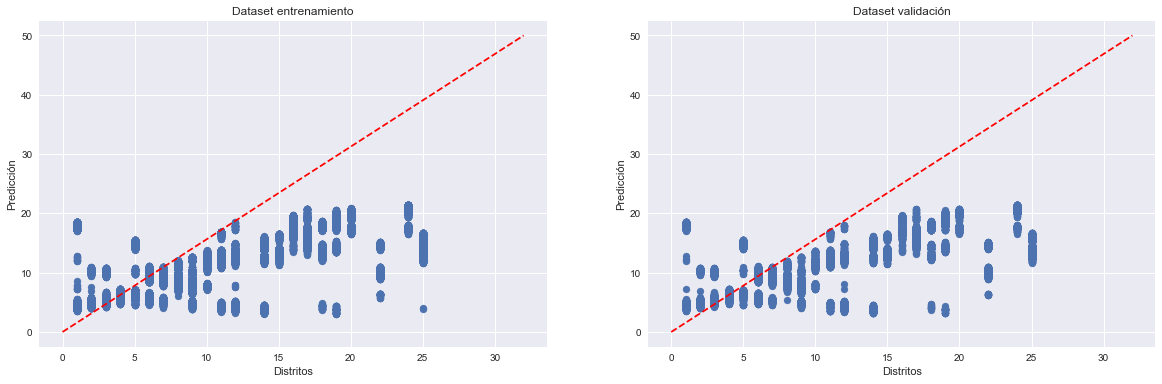

In [160]:
# Generamos el gráfico de dispersión y veremos si el set de entrenamiento lo hace mejor que el set de test 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 6))

ax1.set_title("Dataset entrenamiento")
ax2.set_title("Dataset validación")
for ax in (ax1, ax2):
    ax.set_ylabel("Predicción")
    ax.set_xlabel("Distritos")
    ax.plot(np.linspace(0, 32), np.linspace(0, 50), "r--")

ax1.scatter(y_train, y_hat_train)
ax2.scatter(y_test, y_hat_test)

plt.show()

### Modelado | Gradient Boosting

In [116]:
from sklearn.ensemble import GradientBoostingClassifier

Xgb_train=X_train
ygb_train=y_train
Xgb_test=X_test
ygb_test=y_test
variables_gb = variables

list_estimators = (10, 20, 30)

for n_estimators in list_estimators:
  gb = GradientBoostingClassifier(
      n_estimators=n_estimators,
      random_state = 0
  )
  gb.fit(Xgb_train, ygb_train)

In [117]:
for name, importance in zip(variables_gb, gb.feature_importances_):
  print(f"{name}: {importance:.2f}")

Ward: 0.46
Census Tracts: 0.10
Police Beats: 0.45
Primary Type: 0.00
Location Description: 0.00
Arrest_True: 0.00


In [118]:
print('Precisión Gradient Boosting train/test  {0:.3f}/{1:.3f}'
      .format(gb.score(Xgb_train, ygb_train), gb.score(Xgb_test, ygb_test)))

Precisión Gradient Boosting train/test  0.969/0.967


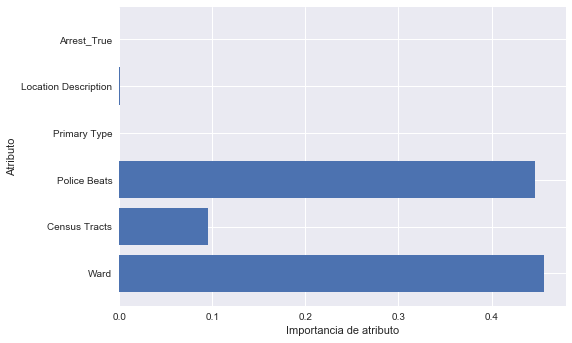

In [119]:
# Mostramos la importancia de cada atributo
n_atributos = 6
plt.barh(range(n_atributos), gb.feature_importances_, align='center')
plt.yticks(np.arange(n_atributos), variables_gb)
plt.xlabel("Importancia de atributo")
plt.ylabel("Atributo")
plt.show();

### Backward Elimination - Stepwise

Stepwise es una familia de métodos para la selección de características de forma iterativa. Una vez que eliminamos las variables, se comprueba la calidad de los modelos y se selecciona el mejor, en caso de que sea el original, el proceso termina, en caso de que sea otro, el proceso vuelve a comenzar.

- Backward elimination: lo que implica comenzar con todas las variables, comprobamos que pasa si eliminamos una característica utilizando un criterio para comparar el nuevo modelo con el anterior. 

Si al eliminar una variable en cada paso se mejora el modelo, se repetie este proceso hasta que al eliminar una variable no mejore el modelo.

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

rfe_feature_selector = RFECV(
    LogisticRegression(solver="liblinear"),
    cv = 5,
    scoring = "neg_log_loss", 
    n_jobs=-1,
).fit(Xgb_train, ygb_train)

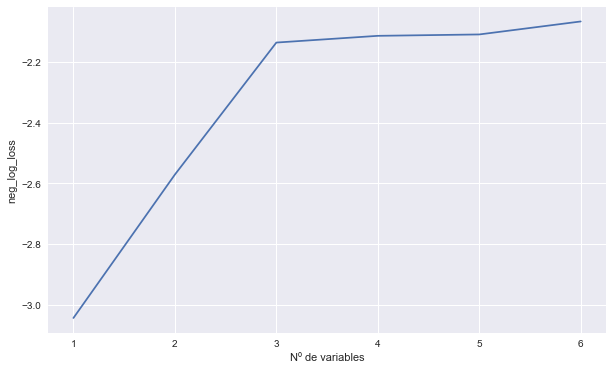

Variables a eliminar:


In [121]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_ylabel("neg_log_loss")
ax.set_xlabel("Nº de variables")
ax.plot(
    [i + 1 for i in range(Xgb_train.shape[1])],
    rfe_feature_selector.grid_scores_
)
plt.show()

print("Variables a eliminar:")
for feature in variables_gb[~rfe_feature_selector.support_]:
  print(f"\t{feature}")

In [122]:
# En este caso, el modelo nos dice que no debemos eliminar ninguna variable
# En caso de tener que eliminar alguna variable, utilizariamos el siguiente código

# Xgb_train = rfe_feature_selector.transform(Xgb_train)
# variables_gb = variables_gb[rfe_feature_selector.support_]

## Optimización de hiperparámetros

Importamos la funcion extract_results para ver los resultados estadísticos (media y varianza) de la muestra, tanto en el set de entrenamiento como en el set de test de la optimización con el modelo GridSearch. 

In [123]:
def extract_results(search_estimator):
  """ Extrae los resultados de un optimizador de hiperparámetros.
  Args:
    search_estimator (object): GridSearchCV o RandomizedSearchCV ya entrenado.
  Returns:
    pd.DataFrame con los resultados sumarizados.
  """
  models = pd.DataFrame(search_estimator.cv_results_['params'])
  results = []
  for i in range(search_estimator.cv):
    partial = models.copy()
    partial["split"] = i
    partial["train_score"] = search_estimator.cv_results_[f'split{i}_train_score']
    partial["test_score"] = search_estimator.cv_results_[f'split{i}_test_score']
    results.append(partial)
  results = pd.concat(results, axis = 0)
  return results.groupby(list(models.columns)).agg({
      "train_score": ["mean", "var"], "test_score": ["mean", "var"]})

In [124]:
from sklearn.model_selection import GridSearchCV

np.random.seed(0)

param_grid = {
    "n_estimators": [10, 20, 30],
    "min_samples_split": [2, 30, 60],
    "subsample": [1.0, 0.8, 0.6]
}

grid_search = GridSearchCV(
    GradientBoostingClassifier(),
    param_grid = param_grid,
    cv = 5,
    verbose = 1,
    return_train_score = True,
    scoring = "neg_log_loss",
    n_jobs=-1
).fit(Xgb_train, ygb_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 32.6min finished


In [125]:
extract_results(grid_search)

train_score               test_score  \
                                                mean           var       mean   
min_samples_split n_estimators subsample                                        
2                 10           0.6         -0.772360  2.129152e-05  -0.774950   
                               0.8         -0.775900  5.411376e-05  -0.778356   
                               1.0         -0.774650  3.129466e-05  -0.777314   
                  20           0.6         -0.386429  1.523551e-05  -0.388928   
                               0.8         -0.389512  1.399792e-05  -0.392656   
                               1.0         -0.387846  9.863214e-06  -0.390426   
                  30           0.6         -0.235459  4.927588e-07  -0.237924   
                               0.8         -0.234921  8.609832e-06  -0.237788   
                               1.0         -0.234942  5.915417e-06  -0.237674   
30                10           0.6         -0.776555  5.591724e-05  -0.779671   
                               0.8         -0.773907  1.664504e-05  -0.775598   
                               1.0         -0.774653  3.124873e-05  -0.777316   
                  20           0.6         -0.386278  1.073070e-05  -0.389521   
                               0.8         -0.387920  1.314582e-05  -0.390717   
                               1.0         -0.387867  9.872712e-06  -0.390461   
                  30           0.6         -0.233449  7.024816e-06  -0.236491   
                               0.8         -0.232745  9.748165e-06  -0.235458   
                               1.0         -0.234665  3.311134e-06  -0.237385   
60                10           0.6         -0.774349  1.387322e-05  -0.777079   
                               0.8         -0.777528  7.521670e-05  -0.779979   
                               1.0         -0.774653  3.124873e-05  -0.777316   
                  20           0.6         -0.386877  1.643288e-05  -0.389611   
                               0.8         -0.392893  1.152277e-05  -0.395765   
                               1.0         -0.387867  9.874445e-06  -0.390461   
                  30           0.6         -0.234730  2.518064e-06  -0.237941   
                               0.8         -0.233251  3.647664e-06  -0.235821   
                               1.0         -0.234717  3.278500e-06  -0.237439   

                                                    
                                               var  
min_samples_split n_estimators subsample            
2                 10           0.6        0.000049  
                               0.8        0.000116  
                               1.0        0.000080  
                  20           0.6        0.000053  
                               0.8        0.000016  
                               1.0        0.000045  
                  30           0.6        0.000032  
                               0.8        0.000019  
                               1.0        0.000007  
30                10           0.6        0.000316  
                               0.8        0.000090  
                               1.0        0.000080  
                  20           0.6        0.000037  
                               0.8        0.000042  
                               1.0        0.000045  
                  30           0.6        0.000017  
                               0.8        0.000005  
                               1.0        0.000012  
60                10           0.6        0.000172  
                               0.8        0.000083  
                               1.0        0.000080  
                  20           0.6        0.000124  
                               0.8        0.000090  
                               1.0        0.000045  
                  30           0.6        0.000019  
                               0.8        0.000022  
                               1.0        0.000012

In [126]:
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor resultado: {grid_search.best_score_:.3f}")

Mejores parámetros: {'min_samples_split': 30, 'n_estimators': 30, 'subsample': 0.8}
Mejor resultado: -0.235


## Evaluación final del Gradient Boosting

In [127]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import log_loss

pipeline = Pipeline([
  ("rfe", rfe_feature_selector),
  ("estimator", grid_search)                      
])

In [128]:
ygb_test_pred = pipeline.predict_proba(Xgb_test)
print(f"Log loss test: {log_loss(ygb_test, ygb_test_pred):.3f}")

Log loss test: 0.239


## Random Forest

In [27]:
Xrf_train=X_train
yrf_train=y_train
Xrf_test=X_test
yrf_test=y_test
variables_rf = variables

list_estimators = (1, 50, 100)

for n_estimators in list_estimators:
  rf = RandomForestClassifier(
      n_estimators=n_estimators,
      max_depth=50,
      random_state = 0
  )
  rf.fit(Xrf_train, yrf_train)

In [28]:
for name, importance in zip(variables_rf, rf.feature_importances_):
  print(f"{name}: {importance:.2f}")

Ward: 0.34
Census Tracts: 0.22
Police Beats: 0.41
Primary Type: 0.01
Location Description: 0.01
Arrest_True: 0.00


In [30]:
print('Precisión Random Forest train/test  {0:.3f}/{1:.3f}'
      .format(rf.score(Xrf_train, yrf_train), rf.score(Xrf_test, yrf_test)))

Precisión Random Forest train/test  0.994/0.983


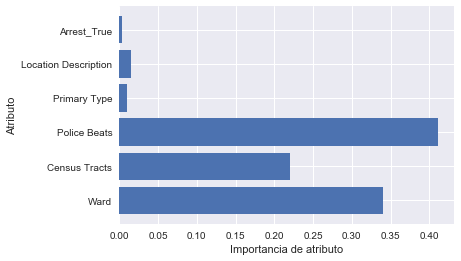

In [31]:
# Mostramos la importancia de cada atributo
n_atributos = 6
plt.barh(range(n_atributos), rf.feature_importances_, align='center')
plt.yticks(np.arange(n_atributos), variables_rf)
plt.xlabel("Importancia de atributo")
plt.ylabel("Atributo")
plt.show();

## Backward Elimination - Stepwise

In [148]:
rfe_feature_selector = RFECV(
    LogisticRegression(solver="liblinear"),
    cv = 5,
    scoring = "neg_log_loss", 
    n_jobs=-1,
).fit(Xrf_train, yrf_train)

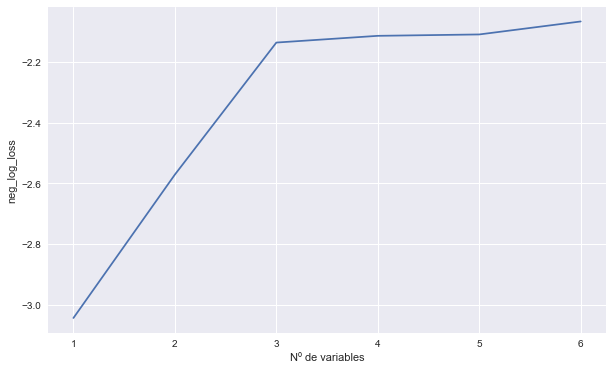

Variables a eliminar:


In [149]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_ylabel("neg_log_loss")
ax.set_xlabel("Nº de variables")
ax.plot(
    [i + 1 for i in range(X_train.shape[1])],
    rfe_feature_selector.grid_scores_
)
plt.show()

print("Variables a eliminar:")
for feature in variables[~rfe_feature_selector.support_]:
  print(f"\t{feature}")

In [150]:
# Nos vuelve a ocurrir lo mismo que con el modelo Gradient Boosting
# Xrf_train = rfe_feature_selector.transform(Xrf_train)
# variables_rf = variables_rf[rfe_feature_selector.support_]

**En este modelo, queremos utilizar también, los métodos de selección de variables para modelos no supervisados.**

- **Queremos darle al estudio un análisis sin tener en cuenta la variable objetivo, viendo que variable depende de ella misma y no de la relación con las demás.**

### Variance Threshold

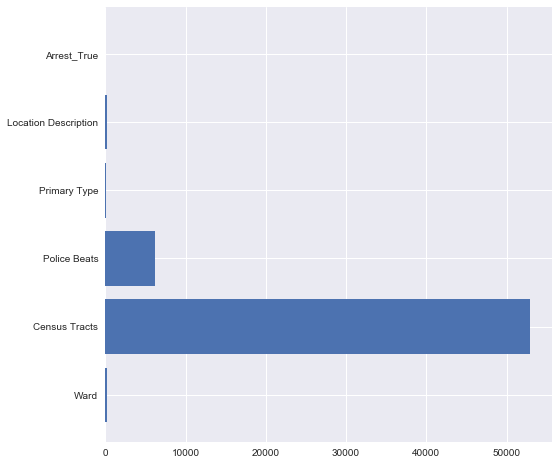

In [151]:
from sklearn.feature_selection import VarianceThreshold

vt_feature_selector = VarianceThreshold(threshold=0.0)
vt_feature_selector.fit(Xrf_train)
fig, ax = plt.subplots(figsize = (8, 8))
ax.barh(variables_rf, vt_feature_selector.variances_)
plt.show()

En caso de que necesitasemos eliminar las variables que fuesen constantes, utilizaríamos el siguiente comando:

In [152]:
# Xrf_train = vt_feature_selector.transform(Xrf_train)
# variables_rf = variables_rf[vt_feature_selector.get_support()]

### Matriz de correlación

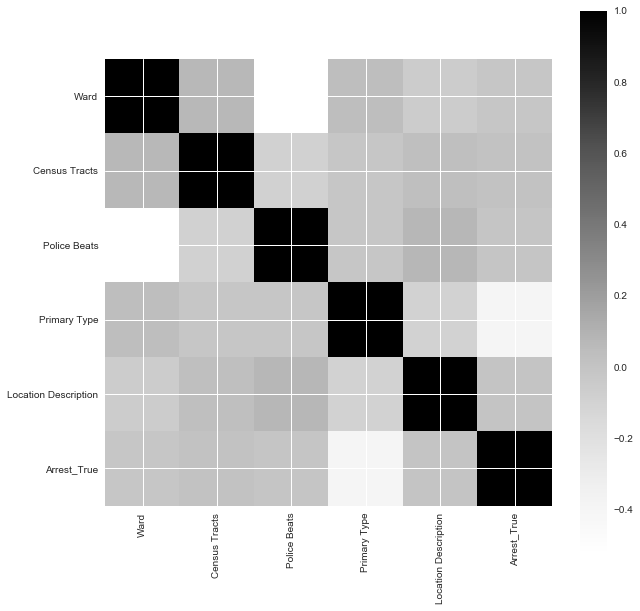

In [153]:
fig, ax = plt.subplots(figsize = (10, 10))
cr_matrix = pd.DataFrame(columns = variables, data = Xrf_train).corr()
im = ax.imshow(cr_matrix)
ax.figure.colorbar(im)
plt.xticks(range(len(variables_rf)), variables_rf, fontsize=10, rotation=90)
plt.yticks(range(len(variables_rf)), variables_rf, fontsize=10, rotation=0)
plt.show()

In [154]:
from scipy.stats import pearsonr

class ColinearityFeatureSelector(object):
  """ Implementa una transformación con el estilo de scikit-learn.
  """

  def __init__(self, threshold = 1.0):
    """ Constructor del objeto.
    Args:
      threshold (float): Umbral que decide si dos variables son colineares. Es
        el coeficiente de correlacion de pearson elevado al cuadrado.
    """
    self.threshold = threshold

  def fit(self, X):
    """ Entrenamiento del transformador.
    Args:
      X(np.Array): Matriz de atributos bidimensional.
    Returns:
      Referencia a sí mismo.
    """
    to_remove = []
    for i in range(X.shape[1]):
      for j in range(i + 1, X.shape[1]):
        r, _ = pearsonr(X[:, i], X[:, j])
        if r**2 >= self.threshold: 
          to_remove.append(j)
    self.support_ = np.array([i not in to_remove for i in range(X.shape[1])])
    return self

  def transform(self, X):
    """ Elimina las variables que se han marcado como colineares.
    Args:
      X(np.Array): Matriz de atributos bidimensional.
    Returns:
      X transformada.
    """
    return X[:, self.support_]

  def fit_transform(self, X):
    """ Entrena, y luego transforma la matriz X.
    Args:
      X(np.Array): Matriz de atributos bidimensional.
    Returns:
      X transformada.
    """
    return self.fit(X).transform(X)

In [155]:
cl_feature_selector = ColinearityFeatureSelector(threshold = 0.9)
cl_feature_selector.fit(Xrf_train)
print("Variables a eliminar:")
for feature in variables_rf[~cl_feature_selector.support_]:
  print(f"\t{feature}")

Variables a eliminar:


In [156]:
# De nuevo no tenemos variables a eliminar

# Xrf_train = cl_feature_selector.transform(Xrf_train)
# variables_rf = variables_rf[cl_feature_selector.support_]

### Optimización de hiperparámetros

In [157]:
from sklearn.model_selection import GridSearchCV

np.random.seed(0)

param_grid = {
    "n_estimators": [1, 50, 100],
    "min_samples_split": [2, 30, 60],
    "subsample": [1.0, 0.8, 0.6]
}

grid_search_rf = GridSearchCV(
    GradientBoostingClassifier(),
    param_grid = param_grid,
    cv = 5,
    verbose = 1,
    return_train_score = True,
    scoring = "neg_log_loss",
    n_jobs=-1
).fit(Xrf_train, yrf_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 81.4min finished


In [158]:
extract_results(grid_search_rf)

train_score               test_score  \
                                                mean           var       mean   
min_samples_split n_estimators subsample                                        
2                 1            0.6         -2.076816  1.660484e-05  -2.077233   
                               0.8         -2.073783  1.375726e-05  -2.075137   
                               1.0         -2.076489  3.592023e-06  -2.077917   
                  50           0.6         -0.122954  3.296561e-06  -0.127552   
                               0.8         -0.123111  2.290099e-06  -0.126862   
                               1.0         -0.123747  2.966999e-06  -0.128159   
                  100          0.6         -0.106263  2.766821e-03  -0.116058   
                               0.8         -0.068153  3.293751e-04  -0.079862   
                               1.0         -0.076356  4.355390e-04  -0.084876   
30                1            0.6         -2.076939  7.483359e-06  -2.078902   
                               0.8         -2.076072  1.597086e-05  -2.076213   
                               1.0         -2.076493  3.578650e-06  -2.077922   
                  50           0.6         -0.123559  2.148885e-06  -0.127973   
                               0.8         -0.122979  3.619049e-07  -0.127576   
                               1.0         -0.123842  1.382580e-06  -0.127860   
                  100          0.6         -0.111500  7.825002e-03  -0.114872   
                               0.8         -0.082953  5.150474e-04  -0.091204   
                               1.0         -0.071072  4.485656e-04  -0.079536   
60                1            0.6         -2.076354  3.874062e-05  -2.077885   
                               0.8         -2.075898  2.466080e-06  -2.077367   
                               1.0         -2.076493  3.578650e-06  -2.077922   
                  50           0.6         -0.122631  2.196633e-06  -0.126528   
                               0.8         -0.123709  6.584940e-07  -0.127156   
                               1.0         -0.123851  9.618161e-07  -0.127768   
                  100          0.6         -0.067735  9.393371e-05  -0.075906   
                               0.8         -0.074753  4.358500e-04  -0.081469   
                               1.0         -0.084792  5.160493e-04  -0.090401   

                                                    
                                               var  
min_samples_split n_estimators subsample            
2                 1            0.6        0.000012  
                               0.8        0.000046  
                               1.0        0.000047  
                  50           0.6        0.000029  
                               0.8        0.000008  
                               1.0        0.000007  
                  100          0.6        0.003129  
                               0.8        0.000591  
                               1.0        0.000360  
30                1            0.6        0.000035  
                               0.8        0.000028  
                               1.0        0.000047  
                  50           0.6        0.000009  
                               0.8        0.000010  
                               1.0        0.000010  
                  100          0.6        0.005397  
                               0.8        0.000463  
                               1.0        0.000180  
60                1            0.6        0.000020  
                               0.8        0.000048  
                               1.0        0.000047  
                  50           0.6        0.000007  
                               0.8        0.000018  
                               1.0        0.000010  
                  100          0.6        0.000054  
                               0.8        0.000281  
                               1.0        0.000323

In [159]:
print(f"Mejores parámetros: {grid_search_rf.best_params_}")
print(f"Mejor resultado: {grid_search_rf.best_score_:.3f}")

Mejores parámetros: {'min_samples_split': 60, 'n_estimators': 100, 'subsample': 0.6}
Mejor resultado: -0.076


### Evaluación final del Random Forest

In [242]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import log_loss

pipeline = Pipeline([
    ("variance", vt_feature_selector),
  ("colinear", cl_feature_selector),
  ("rfe", rfe_feature_selector),
  ("estimator", grid_search)                      
])

In [241]:
ygb_test_pred = pipeline.predict_proba(Xrf_test)
print(f"Log loss test: {log_loss(yrf_test, yrf_test_pred):.3f}")

Log loss test: 0.258
